there are 10999 noise, 11090 muons, and 10911 neutrinos


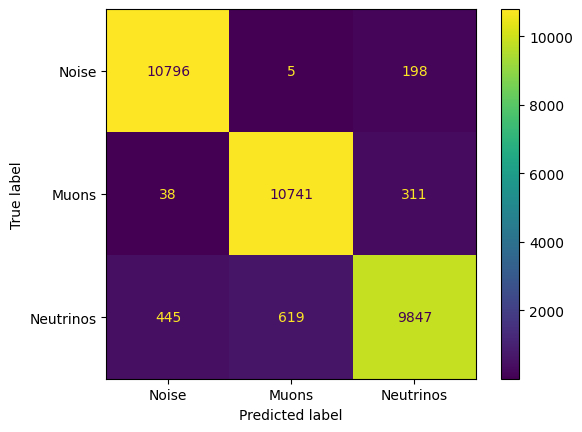

<Figure size 640x480 with 0 Axes>

In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors

indir = "/groups/icecube/petersen/GraphNetDatabaseRepository/example_results/train_classification_model/last_one_lvl3MC/dynedge_pid_example/results.csv"
outdir = "/groups/icecube/qgf305/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/Comparison_RD_MC/test"

results = pd.read_csv(indir).sort_values('event_no').reset_index(drop = True)

#print(results.head(10))
#Noise = 0, muon =1, Neutrino=2
pid_transform = {1:0,12:2,13:1,14:2,16:2}

predictions = []
truth = []

noise = 0
muons = 0
neutrinos = 0 

number = len(results)

for i in range(number):# range(len(results)):
    noise_pred = results['pid_noise_pred'].values[i]
    muon_pred = results['pid_muon_pred'].values[i]
    neutrino_pred = results['pid_neutrino_pred'].values[i]
    predictions.append(np.argmax([noise_pred,muon_pred,neutrino_pred]))

    truth.append(pid_transform[abs(results['pid'].values[i])])
    if pid_transform[abs(results['pid'].values[i])] == 0:
        noise+=1
    if pid_transform[abs(results['pid'].values[i])] == 1:
        muons+=1
    if pid_transform[abs(results['pid'].values[i])] == 2:
        neutrinos+=1

print(f'there are {noise} noise, {muons} muons, and {neutrinos} neutrinos')

confusion_matrix = metrics.confusion_matrix(truth, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Noise','Muons','Neutrinos'])
cm_display.plot()
plt.show()
plt.savefig(outdir + 'Confusion_matrix.png')